In [7]:
#Import libraries
from pathlib import Path
from sqlalchemy import create_engine
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [8]:
# Create SQLite connection
happiness_path = Path('../Resources/HappinessIndexScore.sqlite')
engine = create_engine(f'sqlite:///{happiness_path}')

In [9]:
# Create df
happiness_df = pd.read_sql('SELECT * FROM final_output', con=engine)
happiness_df.head()

,country,region,ladder_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perceptions_corruption,population_density,unemployment_rate,median_age,gini_coefficient,avg_temperature,lt_alcohol_per_capita
0,Finland,Europe,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,16.60,7.16,43.2,27.7,3.24,8.23
1,Denmark,Europe,7.586,10.962,0.954,71.250,0.934,0.134,0.196,138.00,5.14,42.2,27.7,9.77,9.16
2,Iceland,Europe,7.530,10.896,0.983,72.050,0.936,0.211,0.668,3.50,3.56,37.8,26.1,2.11,7.72
3,Israel,Middle East,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,412.24,3.39,30.1,38.6,20.23,3.07
4,Netherlands,Europe,7.403,10.942,0.930,71.550,0.887,0.213,0.379,420.38,3.56,42.2,29.2,11.72,8.23


In [10]:
# Drop unnecesary columns
happiness_df.drop(['country', 'region', 'logged_GDP_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_life_choices', 'generosity', 'perceptions_corruption'], inplace= True, axis= 1)

In [11]:
# Define features set & drop lader score column from X variable
X = happiness_df.copy()
X = happiness_df.drop(columns=['ladder_score'])


In [12]:
# Define target vector
y = happiness_df["ladder_score"].ravel()

/var/folders/tg/jpl0p2w93ndfvsd8ln2wc1pw0000gn/T/ipykernel_71402/3483704943.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = happiness_df["ladder_score"].ravel()


In [13]:
#Splitting into Train and Test sets
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=48)

In [14]:
lm = LinearRegression()

In [15]:
# train the linear regression model
lm.fit(x_train, y_train)

LinearRegression()

## Evaluate our model

In [16]:
#Print the intercept
print(lm.intercept_)

3.1356087134268673


In [17]:
#Print the coefficient. Positive coeff means value of independent variable increases. 
# A negative coeff suggests that as the independent variable increases, the dependent variable tend to decrease
#Source: https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/
print(lm.coef_)
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

[ 4.91108774e-05 -5.22164322e-02  7.22148682e-02  2.39356272e-02
 -2.72998773e-02  1.07372603e-02]


,Coeff
population_density,0.000049
unemployment_rate,-0.052216
median_age,0.072215
gini_coefficient,0.023936
avg_temperature,-0.027300
lt_alcohol_per_capita,0.010737


In [18]:
predictions = lm.predict(x_test)
predictions

array([3.98306878, 6.6670978 , 6.35547558, 5.65734587, 5.97699967,
       4.95196665, 5.33646015, 4.59025336, 4.94085707, 5.48780943,
       5.10818794, 5.52009831, 4.83804152, 4.62378076, 4.4523046 ,
       5.0975481 , 4.13275674, 5.87428563, 6.29693472, 6.37396168,
       6.37597966, 4.659247  , 4.25893291, 4.23002037, 5.4323694 ,
       6.44001183, 5.28452542, 4.82117357, 4.25102222, 6.3103672 ,
       5.38632584])

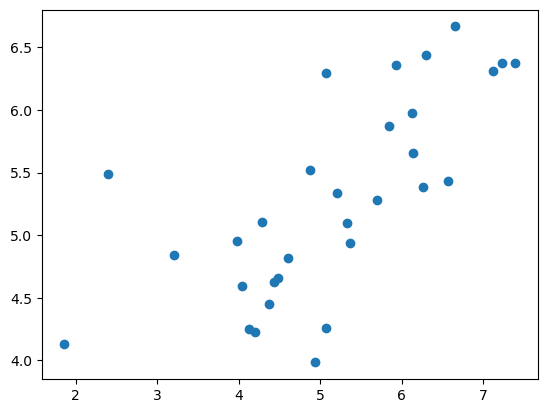

In [19]:
plt.scatter(y_test, predictions)

In [20]:
#Regression evaluation matrix 
metrics.mean_absolute_error(y_test, predictions)

0.6760853742457231

In [21]:
metrics.mean_squared_error(y_test, predictions)

0.9145493958088248

In [22]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.9563207598963983

In [23]:
metrics.r2_score(y_test, predictions)

0.46513243644156177

In [24]:
#Source: https://github.com/vivek2319/Linear-Regression-Prediction/blob/master/Linear_Regression_Scikit_learn.py